In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("Employees.xlsx")

In [4]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [6]:
data.shape

(689, 15)

In [7]:
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["Gender"].value_counts()

Gender
Male      449
Female    240
Name: count, dtype: int64

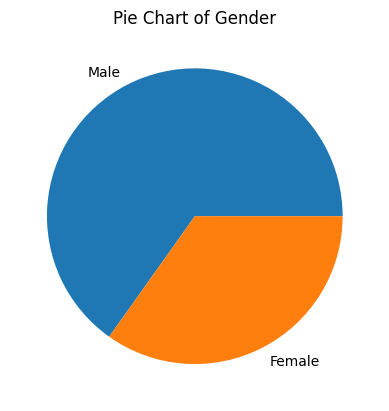

In [11]:
data["Gender"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Pie Chart of Gender")
plt.ylabel("")
plt.show()

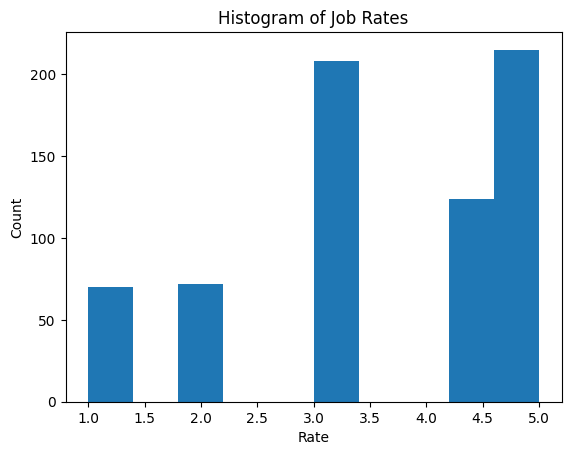

In [15]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rates")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [16]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

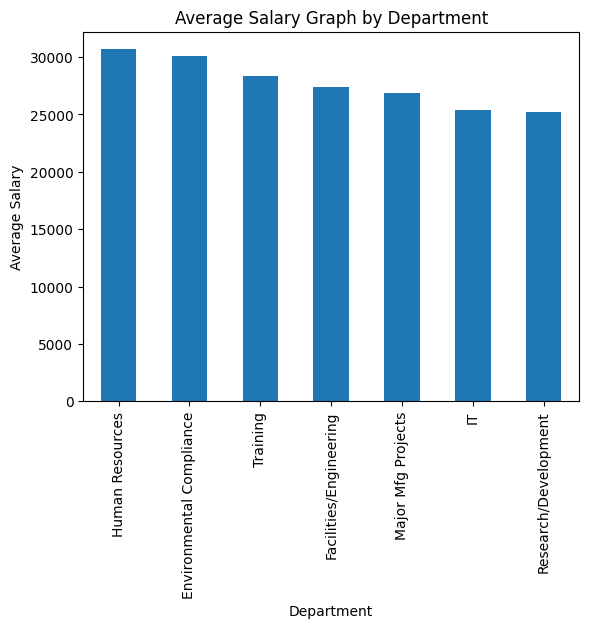

In [20]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).head(7).plot(kind = "bar")
plt.title("Average Salary Graph by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

<Axes: xlabel='Center'>

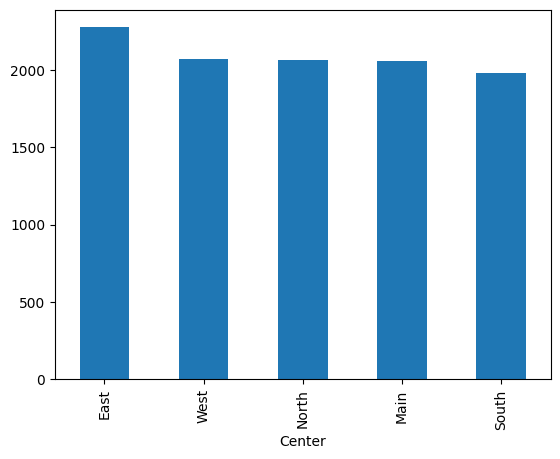

In [22]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False).plot(kind = "bar")

In [23]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

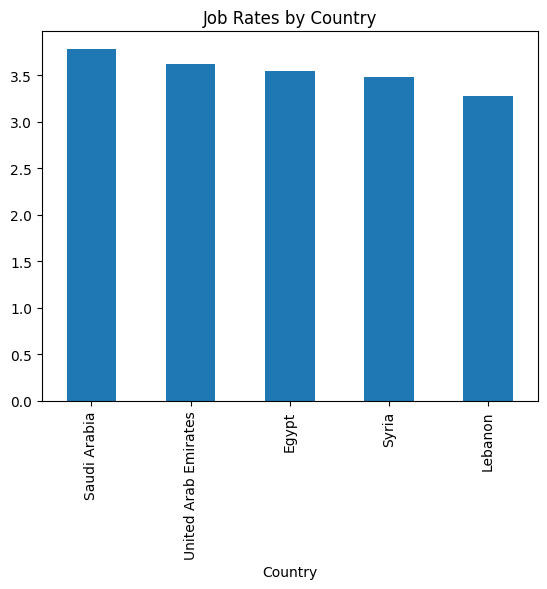

In [27]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind = "bar")
plt.title("Job Rates by Country")
plt.xlabel("Country")
plt.show()

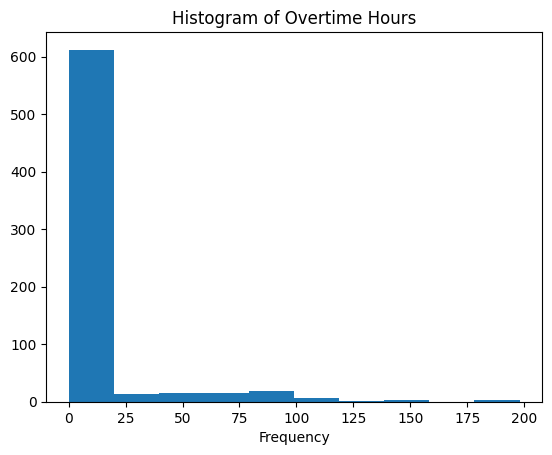

In [28]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Frequency")
plt.show()

In [29]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [31]:
x = data[["Years", "Job Rate"]]
y = data["Annual Salary"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
len(X_train)

551

In [35]:
len(y_test)

138

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
predslr = lr.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(predslr, y_test)

7423.824870068766

In [45]:
import joblib
joblib.dump(lr, "linearmodel.pkl")

['linearmodel.pkl']